In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
#https://www.census.gov/data/datasets/time-series/demo/sahie/estimates-acs.html

In [8]:

data = pd.read_csv('sahie_2022.csv', low_memory=False)
data['state_name'] = data['state_name'].str.strip() # remove the spaces 
data['county_name'] = data['county_name'].str.strip()# remove the spaces 
texas_data = data[data['state_name'] == 'Texas'].copy() #only Texas data
texas_data.drop(columns='Unnamed: 25', inplace=True) #remove blank column on right 
texas_data.dropna(axis=0, inplace=True) #remove rows with Na values 
texas_data = texas_data[texas_data['county_name'] != ''].copy() #remove rows with a blank county name 
texas_data.reset_index(drop=True, inplace=True) #reset index 
texas_data.rename(columns={'iprcat':'Income Category', 'PCTELIG':'Percent Uninsured for all income levels', 
                           'NUI':'Number Uninsured',
                           'NIC': 'Number Insured', 'nui_moe': 'Number Uninsured MOE', 
                           'nic_moe':'Number Insured MOE',
                           'pctelig_moe':'Percent Uninsured for all income levels MOE', 
                           'PCTLIIC':'Percent Insured for all income levels',
                           'pctliic_moe':'Percent Insured for all income levels MOE'}, inplace=True) #rename columns
#make sure columns that have numbers are the right type, and not 'object'
cols = texas_data.loc[:, 'statefips':'Percent Insured for all income levels MOE'].columns
texas_data[cols] = texas_data[cols].apply(pd.to_numeric, errors='coerce')

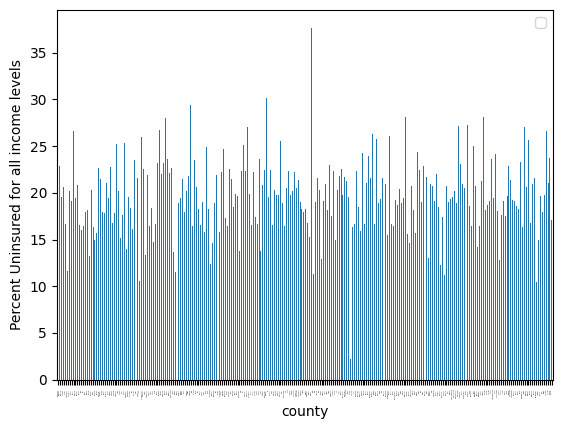

The highest percentage is 37.7% and the lowest is 2.2%
The county with the highest percentage is Kenedy and the lowest is Loving


In [9]:
newdata = texas_data[
    (texas_data['agecat'] == 0) &
    (texas_data['racecat'] == 0) &
    (texas_data['sexcat'] == 0) &
    (texas_data['Income Category'] == 0)
].copy()
newdata['county_name'] = newdata['county_name'].str.replace(r'\s*county\s*','',case=False, regex=True)
newdata.rename(columns={'county_name':'county'}, inplace=True)
newdata['Percent Uninsured for all income levels'] = newdata['Percent Uninsured for all income levels'].astype(dtype='float64')
newdata.set_index('county', drop=True, inplace=True)

newdata.plot(kind='bar', y='Percent Uninsured for all income levels')
plt.xticks(fontsize=1)
plt.legend(labels = '')
plt.ylabel('Percent Uninsured for all income levels')
plt.show()

highest = newdata['Percent Uninsured for all income levels'].max()
lowest = newdata['Percent Uninsured for all income levels'].min()
county_highest = newdata['Percent Uninsured for all income levels'].idxmax()
county_lowest = newdata['Percent Uninsured for all income levels'].idxmin()

this = (
    f'The highest percentage is {round(highest,2)}% and the lowest is {round(lowest, 3)}%\n'
    f'The county with the highest percentage is {county_highest} and the lowest is {county_lowest}'
)
print(this)